In [72]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.base import BaseEstimator, ClassifierMixin, RegressorMixin, ClusterMixin
import re
from sklearn.multiclass import OneVsRestClassifier

import pandas as pd
import io
import pandas, xgboost, numpy, textblob, string
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers
from wordcloud import WordCloud, STOPWORDS

In [74]:
pd.set_option('display.max_rows', 100)

modeltotrain = pd.read_csv('wiki_movie_plots_deduped.csv')   
modeltotest = pd.read_csv('wiki_movie_plots_deduped.csv')
modeltotest.drop_duplicates(subset ="Title",keep = False, inplace = True) 
modeltotrain.drop_duplicates(subset ="Title",keep = False, inplace = True) 
genrex=modeltotrain["Genre"]
genrex=list(filter(None,genrex))

modeltotest1 = pd.read_csv('submission.csv') 
plottotrains2 = modeltotest["Plot"].values.astype('U')
plottotrains2=list(filter(None,plottotrains2))
plottotrains = []
release_year=modeltotrain["Release Year"]
release_year=list(filter(None,release_year))
title=modeltotrain["Title"]
title=list(filter(None,title))
origin=modeltotrain["Origin/Ethnicity"]
origin=list(filter(None,origin))
director=modeltotrain["Director"]
director=list(filter(None,director))
cast=modeltotrain["Cast"]
cast=list(filter(None,cast))
wikip=modeltotrain["Wiki Page"]
wikip=list(filter(None,wikip))
uniquedir=modeltotrain["Director"].unique()
unqiuemov=modeltotrain["Title"].unique()
uniquegen=modeltotrain["Genre"].unique()
#print(len(uniquegen))
stopword = set("is a the then their of how if so".split())
print(genre)
for str in plottotrains2: 
    s_list = [word for word in str.split() if word not in stopword]
    str_ = ' '.join(s_list)   
    plottotrains.append(str_) 


['unknown', 'unknown', 'unknown', 'unknown', 'western', 'comedy', 'unknown', 'short', 'short action/crime western', 'biographical', 'comedy', 'drama', 'drama', 'comedy', 'western', 'drama', 'drama', 'drama', 'unknown', 'drama', 'comedy', 'drama', 'drama', 'unknown', 'unknown', 'silent sports', 'drama', 'unknown', 'unknown', 'drama', 'unknown', 'drama', 'unknown', 'comedy', 'drama', 'unknown', 'unknown', 'comedy', 'comedy', 'comedy', 'crime', 'drama', 'drama', 'drama', 'drama, horror', 'unknown', 'comedy', 'adventure', 'historical drama', 'comedy', 'comedy', 'comedy', 'comedy', 'drama', 'unknown', 'unknown', 'comedy', 'comedy', 'drama', 'unknown', 'biographical drama', 'unknown', 'documentary drama', 'comedy', 'comedy', 'comedy', 'comedy', 'comedy', 'comedy', 'comedy', 'comedy', 'comedy', 'unknown', 'western', 'western', 'drama', 'unknown', 'comedy', 'comedy', 'drama', 'comedy', 'epic', 'unknown', 'adventure', 'comedy short', 'comedy, western', 'drama', 'drama', 'drama', 'comedy', 'come

In [75]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    #text = re.sub('\W', ' ', text)
    #text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

In [76]:
movies=pandas.DataFrame()
movies['Plot']=plottotrains
plottotrains = movies['Plot'].apply(clean_text)


In [77]:
print(len(genrex))

30361


In [78]:
print(len(plottotrains))

30361


In [145]:
s = pandas.DataFrame()
s['Genre'] =genrex
s['Genre']=s['Genre'].str.strip()
s['Genre']=s['Genre'].str.replace(' - ', 'unknown')
s['Genre']=s['Genre'].str.replace(' / ', 'unknown')
s['Genre']=s['Genre'].str.replace('/', 'unknown')
s['Genre']=s['Genre'].str.replace(' & ', 'unknown')
s['Genre']=s['Genre'].str.replace(', ', 'unknown')
s['Genre']=s['Genre'].str.replace('; ', 'unknown')
s['Genre']=s['Genre'].str.replace('bio-pic', 'biography')
s['Genre']=s['Genre'].str.replace('biopic', 'biography')
s['Genre']=s['Genre'].str.replace('biographical', 'biography')
s['Genre']=s['Genre'].str.replace('biodrama', 'biography')
s['Genre']=s['Genre'].str.replace('bio-drama', 'biography')
s['Genre']=s['Genre'].str.replace('biographic', 'biography')
s['Genre']=s['Genre'].str.replace('historydisaster','history|disaster')
s['Genre']=s['Genre'].str.replace('warcomedy','war|comedy')
s['Genre']=s['Genre'].str.replace('westerncomedy','western|comedy')
s['Genre']=s['Genre'].str.replace('ancientcostume','costume')
s['Genre']=s['Genre'].str.replace('computeranimation','animation')
s['Genre']=s['Genre'].str.replace('dramatic','drama')
s['Genre']=s['Genre'].str.replace('familya','family')
s['Genre']=s['Genre'].str.replace('familya','family')
s['Genre']=s['Genre'].str.replace('biography about montreal canadiens star|maurice richard','biography')
s['Genre']=s['Genre'].str.replace('bholenath movies|cinekorn entertainment','unknown')
s['Genre']=s['Genre'].str.replace('superheroe','superhero')
s['Genre']=s['Genre'].str.replace('biogtaphy','biography')
s['Genre']=s['Genre'].str.replace('devotionalbiography','devotional|biography')
s['Genre']=s['Genre'].str.replace('docufiction','documentary|fiction')
s['Genre']=s['Genre'].str.replace('familydrama','family|drama')
s['Genre']=s['Genre'].str.replace('espionage','spy')
s['Genre']=s['Genre'].str.replace('supeheroes','superhero')
s['Genre']=s['Genre'].str.replace('romancefiction','romance|fiction')
s['Genre']=s['Genre'].str.replace('horrorthriller','horror|thriller')
print(len(s))
genre=s['Genre']

uniquegen=s["Genre"].unique()

print(len(uniquedir))

30361
11509


In [146]:
print(len(title))

30361


In [147]:
print(len(unqiuemov))

30361


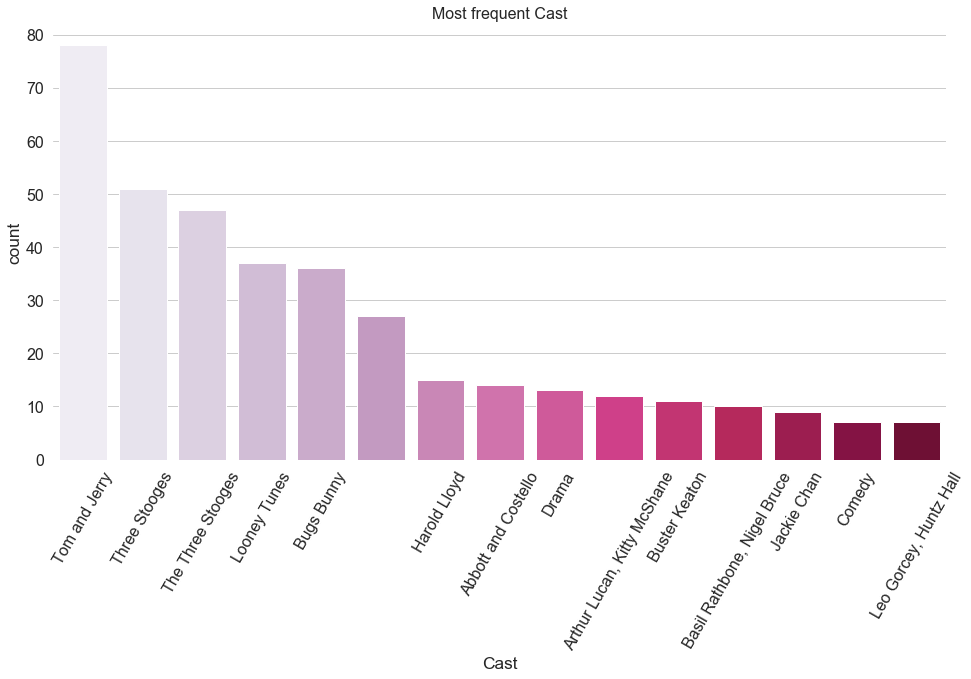

In [154]:
plt.figure(figsize=(16,8))
plt.title('Most frequent Cast',fontsize=16)
plt.xlabel('Cast')
wer = pandas.DataFrame()
wer["Cast"]=cast
sns.countplot(wer.Cast,order=pd.value_counts(wer.Cast).iloc[:15].index,palette=sns.color_palette("PuRd", 15))

plt.xticks(size=16,rotation=60)
plt.yticks(size=16)
sns.despine(bottom=True, left=True)
plt.show()

In [148]:
print(len(uniquegen))

1743


In [149]:
print(len(genre))

30361


In [118]:
modeltotest["Genre"].isnull().sum()

0

In [119]:
modeltotest["Director"].isnull().sum()

0

In [120]:
modeltotest["Plot"].isnull().sum()

0

In [121]:
modeltotest["Director"].value_counts()

Unknown                         959
Hanna-Barbera                    74
Michael Curtiz                   67
Lloyd Bacon                      61
Jules White                      59
                               ... 
Bob Einstein                      1
Harry Elfont, Deborah Kaplan      1
Swapna Waghmare                   1
Director: Lone Scherfig           1
M. Prabhu                         1
Name: Director, Length: 11509, dtype: int64

In [122]:
modeltotest["Genre"].value_counts()

unknown                        5243
drama                          5222
comedy                         3985
horror                          981
action                          909
                               ... 
family romance action             1
drama, comedy-drama, comedy       1
action, mystery                   1
sci-fi drama                      1
drama/espionage thriller          1
Name: Genre, Length: 1989, dtype: int64

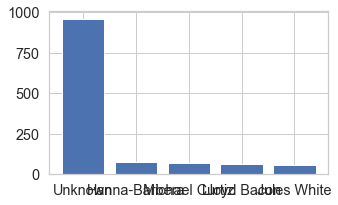

In [123]:
v=uniquedir
g = modeltotrain.groupby(by="Director")["Director"].count().sort_values(ascending=False)

r = range(min(len(v), 5))

plt.figure(figsize=(5,3))
plt.bar(r, g.head()) 
    
plt.xticks(r, g.index)
plt.show()

In [124]:
def get_params():
    params = {'legend.fontsize' : 'Large',
              'figure.figsize'  : figsize,
              'axes.labelsize'  : 'x-large',
              'axes.titlesize'  : 'xx-large',
              'xtick.labelsize' : 'Large',
              'ytick.labelsize' : 'Large'}
    return params


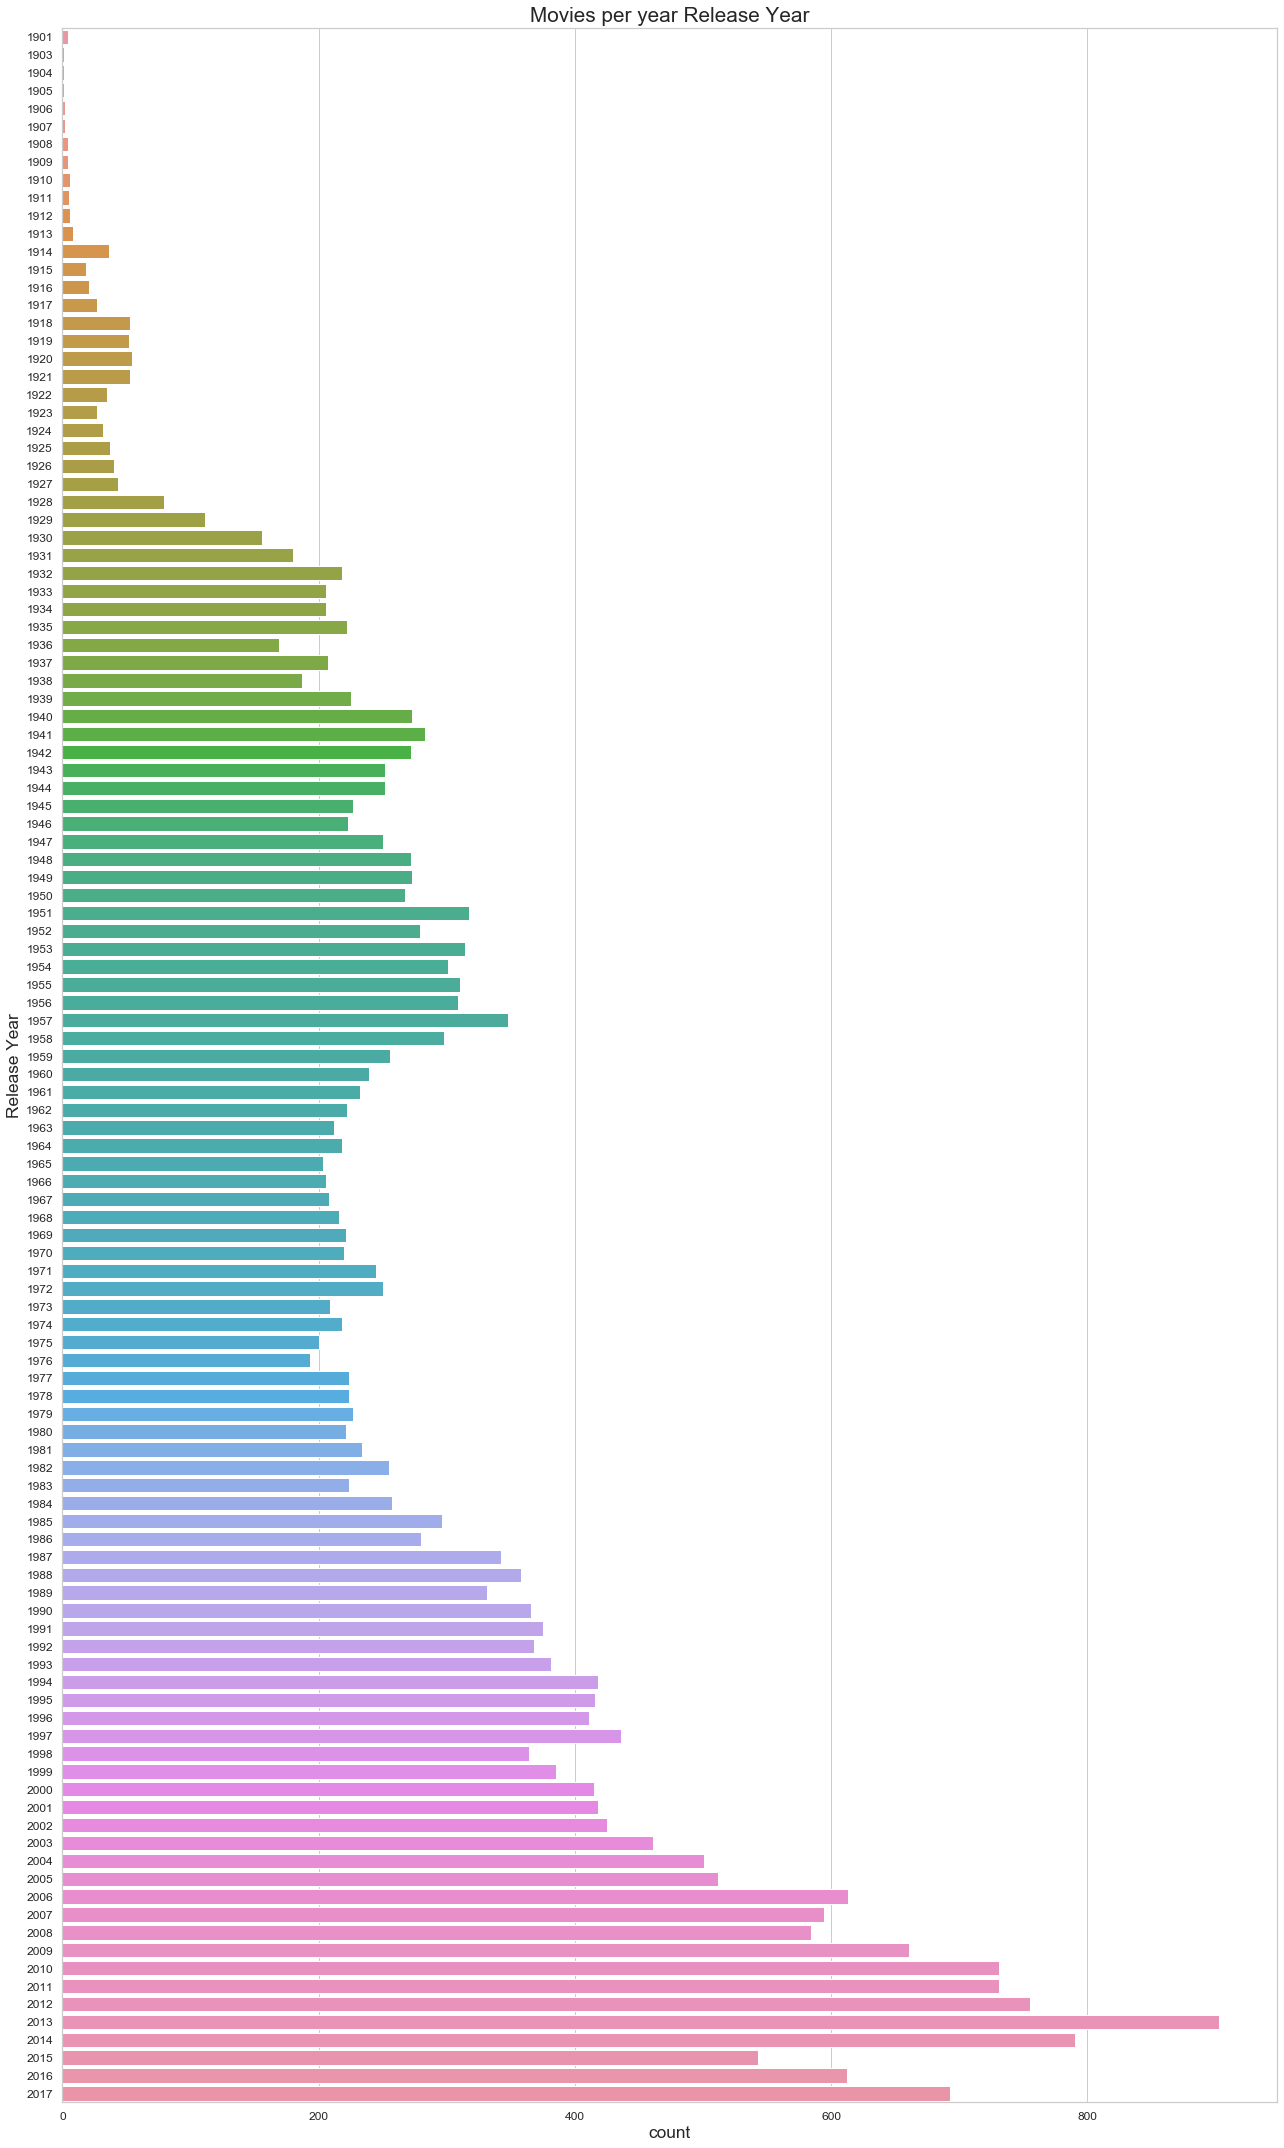

In [125]:
sns.set(style="whitegrid")

figsize=(18, 30)
xcol = "Release Year"

params = get_params()

plt.rcParams.update(params)
plt.tick_params(labelsize=12)
sns.countplot(y=modeltotest[xcol], data=modeltotest)
plt.title("Movies per year "+ xcol)

plt.tight_layout()
plt.show()


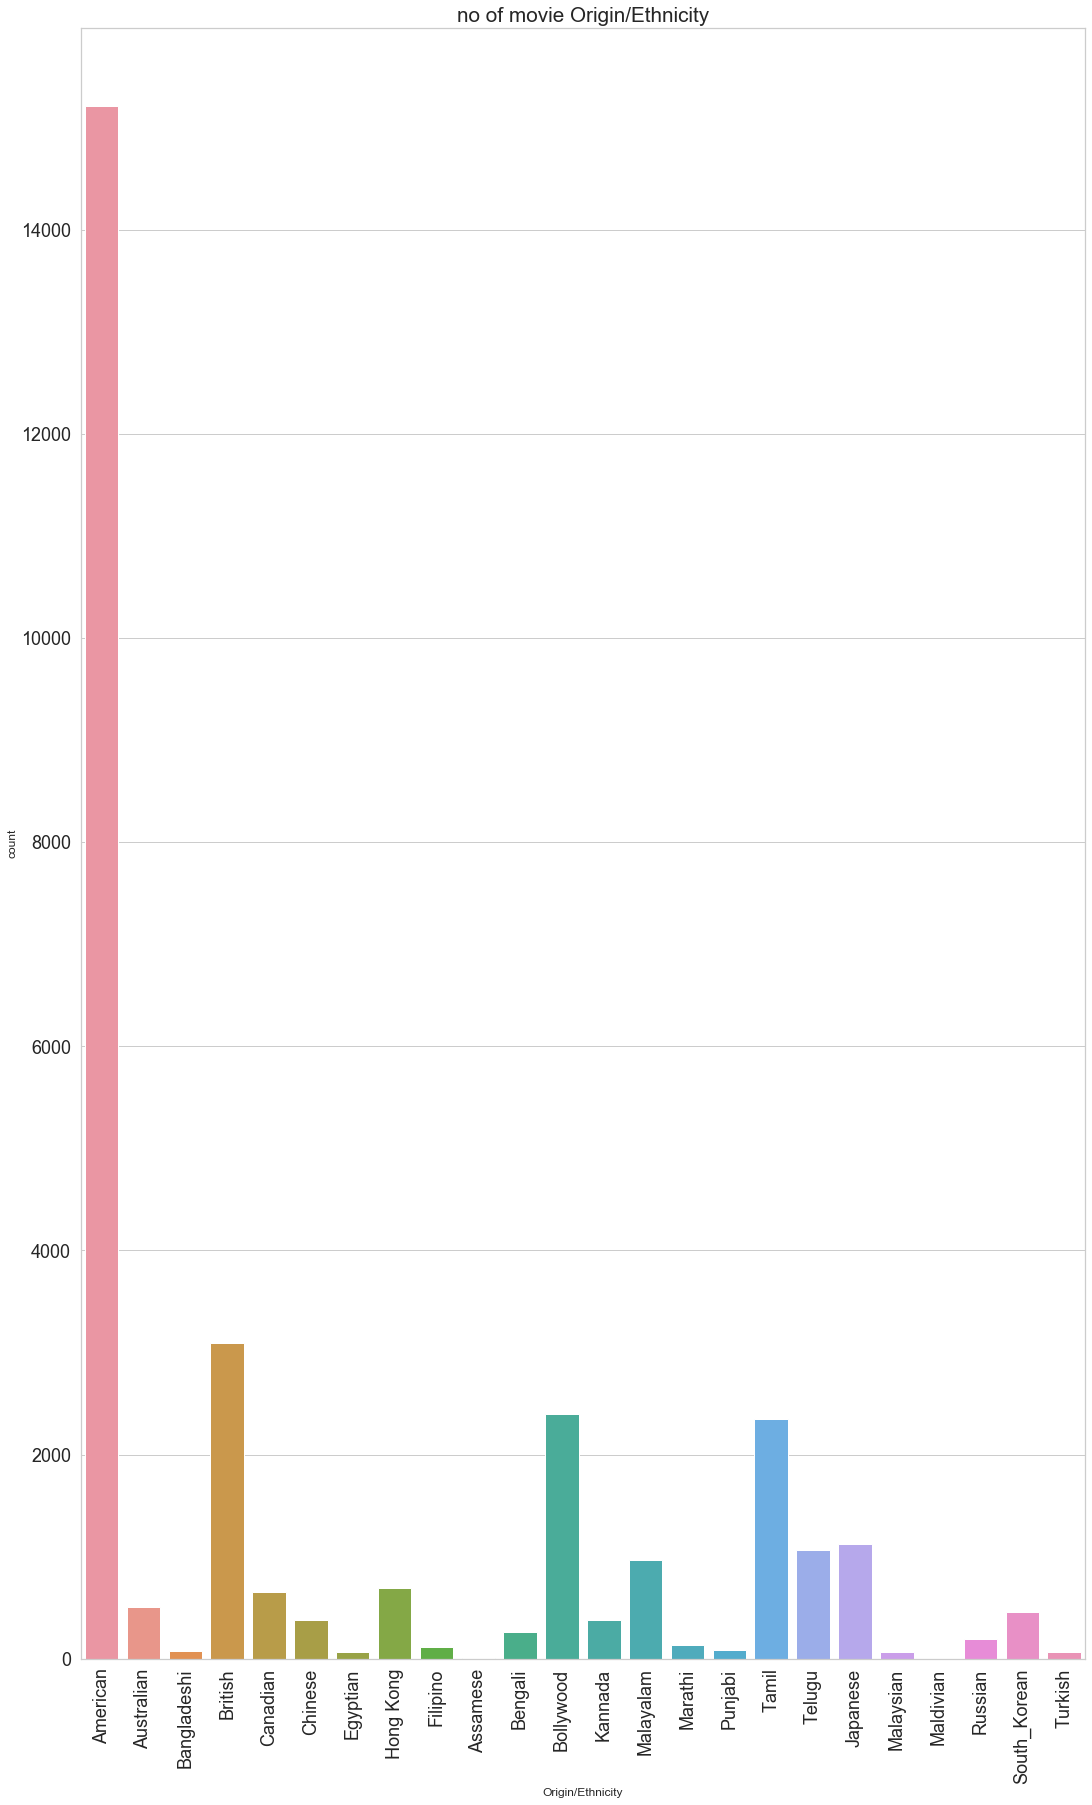

In [126]:
sns.set(style="whitegrid")

figsize=(18, 10)
xcol = "Origin/Ethnicity"

params = get_params()
plt.tick_params(labelsize=18)
plt.rcParams.update(params)
sns.countplot(x=modeltotest[xcol], data=modeltotest)
plt.title("no of movie "+ xcol)

plt.xticks(rotation=90)
plt.show()

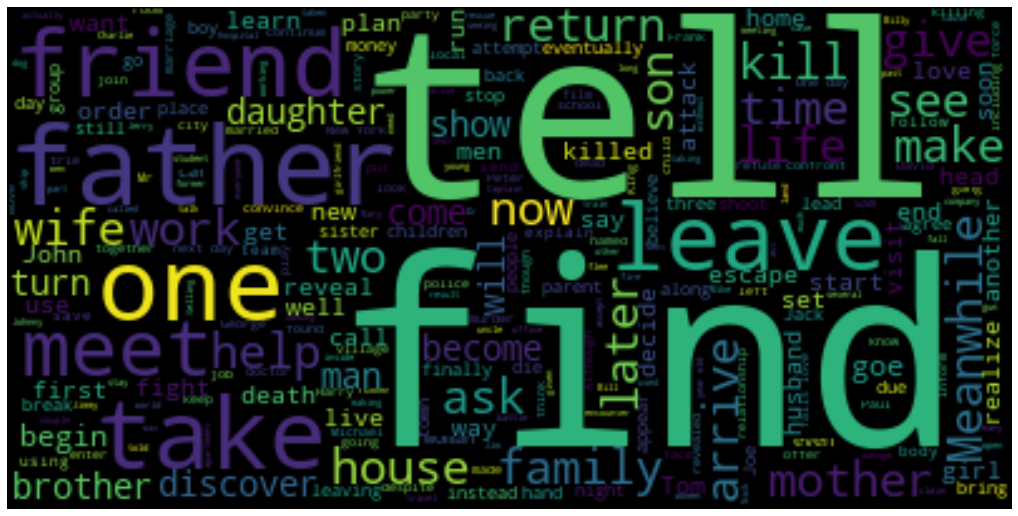

<Figure size 1296x720 with 0 Axes>

In [127]:
text = modeltotest["Plot"].str.cat(sep='. ')

stopwords = set(STOPWORDS)

wc = WordCloud(max_words=2000, stopwords=stopwords)

wc.generate(text)

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.show()

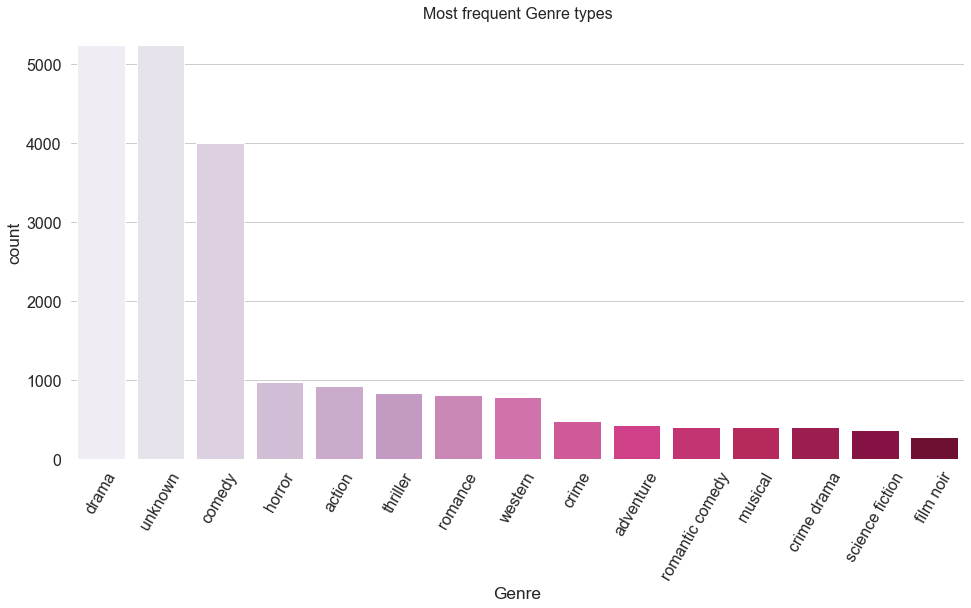

In [128]:
plt.figure(figsize=(16,8))
plt.title('Most frequent Genre types',fontsize=16)
plt.xlabel('Genre')

sns.countplot(s.Genre,order=pd.value_counts(s.Genre).iloc[:15].index,palette=sns.color_palette("PuRd", 15))

plt.xticks(size=16,rotation=60)
plt.yticks(size=16)
sns.despine(bottom=True, left=True)
plt.show()

In [129]:

genre1=[]
count=len(genre)
for i in range(count):
 if genre[i]!="unknown":
    genre1.append(genre[i])

In [130]:
plottotrains1=[]
count=len(genre)
for i in range(count):
 if genre[i]!="unknown":
    plottotrains1.append(plottotrains[i])

In [131]:
encoder = LabelEncoder()
rs = encoder.fit_transform(genre1)
rs.shape

(25118,)

In [132]:
cnt_vectorizer = CountVectorizer( ngram_range=(1,2),max_features=9) 
cnt_vectorizer = cnt_vectorizer.fit(plottotrains1)
features = cnt_vectorizer.transform(plottotrains1)
features_nd = features.toarray()

features_nd.shape

(25118, 9)

In [133]:
plottotest=[]
count=len(genre)
for i in range(count):
 if genre[i]=="unknown":
    plottotest.append(plottotrains[i])

In [134]:
X_train, X_test, y_train, y_test  = train_test_split(features_nd, rs, train_size=0.75,random_state=1234)

In [135]:
nb1 = MultinomialNB()
nb1.fit(X_train, y_train)
nb_pred1 = nb1.predict(X_test)
accuracy_score(y_test,nb_pred1)

0.1625796178343949

In [136]:
multinomialNB=OneVsRestClassifier(MultinomialNB(fit_prior=True, class_prior=None))
multinomialNB.fit(X_train, y_train)
mulpr2=multinomialNB.predict(X_test)
accuracy_score(y_test,mulpr2)

0.16942675159235668

In [137]:
print(len(plottotest))

5243


In [138]:
features1 = cnt_vectorizer.transform(plottotest)
features_nd1 = features1.toarray()


features_nd1.shape

(5243, 9)

In [139]:
multinomialNB1=OneVsRestClassifier(MultinomialNB(fit_prior=True, class_prior=None))
multinomialNB1.fit(features_nd, rs)
mulpr1=multinomialNB1.predict(features_nd1)

In [140]:
trainDF1 = pandas.DataFrame()
inv_pd = encoder.inverse_transform(mulpr1)
trainDF1['rating'] = inv_pd

In [141]:
final_genre=genre
z=trainDF1['rating']
j=0;
count=len(genre)
for i in range(count):
 if genre[i]=="unknown":
    final_genre[i]=z[j]
    j=j+1

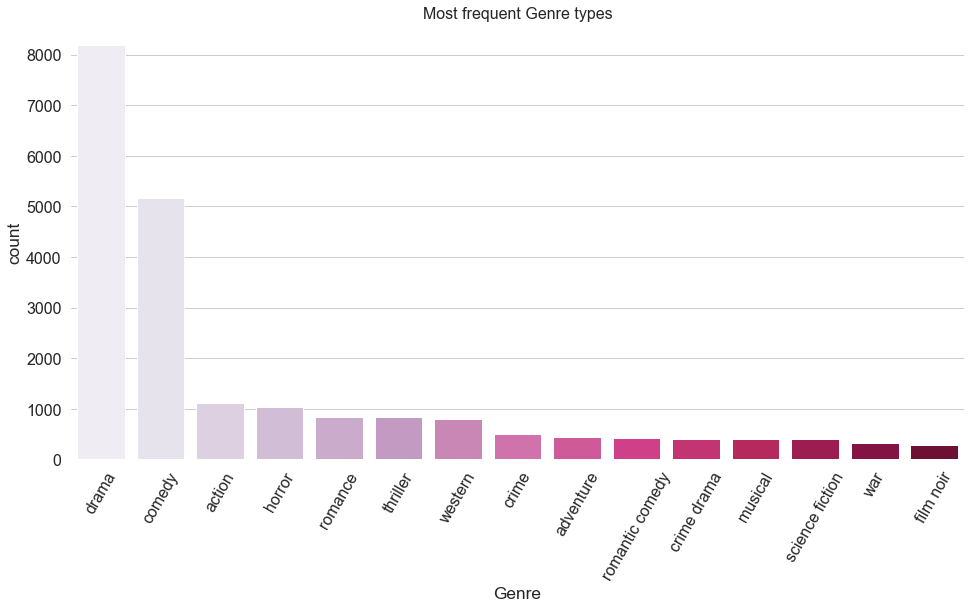

In [142]:
plt.figure(figsize=(16,8))
plt.title('Most frequent Genre types',fontsize=16)
plt.xlabel('Genre')
e = pandas.DataFrame()
e["Genre"]=final_genre
sns.countplot(e.Genre,order=pd.value_counts(e.Genre).iloc[:15].index,palette=sns.color_palette("PuRd", 15))

plt.xticks(size=16,rotation=60)
plt.yticks(size=16)
sns.despine(bottom=True, left=True)
plt.show()

In [143]:
trainDF2 = pandas.DataFrame()
print(len(release_year))
print(len(genre))
print(len(title))
print(len(final_genre))
print(len(plottotrains2))
print(len(plottotrains1))




trainDF2['Release Year'] = release_year
trainDF2['Title'] = title
trainDF2['Origin/Ethinicity'] = origin
trainDF2['Director'] = director
trainDF2['Cast'] = cast
trainDF2['Genre'] = final_genre
trainDF2['Wiki Page'] = wikip
trainDF2['plot'] = plottotrains2

30361
30361
30361
30361
30361
25118


In [144]:
export_csv = trainDF2.to_csv('submission.csv', index = None)